In [38]:
# Initialize Otter
import otter
grader = otter.Notebook("hw3.ipynb")

# CPSC 330 - Applied Machine Learning 

## Homework 3: Preprocessing 
### Associated lectures: [Lectures 4, 5, 6](https://github.com/UBC-CS/cpsc330-2024W2) 

**Due date: [Feb 03, 11:59 pm](https://github.com/UBC-CS/cpsc330-2024W2?tab=readme-ov-file#deliverable-due-dates-tentative).**

## Imports 

In [39]:
from hashlib import sha1
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.dummy import DummyClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score, cross_validate, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

<div class="alert alert-info">

## Submission instructions
<hr>
rubric={points:5}

**You may work with a partner on this homework and submit your assignment as a group.** Below are some instructions on working as a group.  
- The maximum group size is 2. 
- Use group work as an opportunity to collaborate and learn new things from each other. 
- Be respectful to each other and make sure you understand all the concepts in the assignment well. 
- It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline. 
- You can find the instructions on how to do group submission on Gradescope [here](https://help.gradescope.com/article/m5qz2xsnjy-student-add-group-members).
- If you would like to use late tokens for the homework, all group members must have the necessary late tokens available. Please note that the late tokens will be counted for all members of the group.   


Follow the [homework submission instructions](https://github.com/UBC-CS/cpsc330-2024W2/blob/master/docs/homework_instructions.md). 

1. Before submitting the assignment, run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from "1" will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Follow the [CPSC 330 homework instructions](https://ubc-cs.github.io/cpsc330-2024W2/docs/homework_instructions.html), which include information on how to do your assignment and how to submit your assignment.
4. Upload your solution on Gradescope. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 
5. Make sure that the plots and output are rendered properly in your submitted file. If the .ipynb file is too big and doesn't render on Gradescope, also upload a pdf or html in addition to the .ipynb so that the TAs can view your submission on Gradescope.


_Note: The assignments will get gradually more open-ended as we progress through the course. In many cases, there won't be a single correct solution. Sometimes you will have to make your own choices and your own decisions (for example, on what parameter values to use when they are not explicitly provided in the instructions). Use your own judgment in such cases and justify your choices, if necessary._

</div>

## Introduction <a name="in"></a>
<hr>

A crucial step when using machine learning algorithms on real-world datasets is preprocessing. This homework will give you some practice of data preprocessing and building a supervised machine learning pipeline on a real-world dataset. 

## Exercise 1: Dataset and preliminary EDA
<hr>


In this homework, you will be working on [the adult census dataset](https://www.kaggle.com/uciml/adult-census-income#). Download the CSV and save it as `adult.csv` under the data folder in this homework folder. 

This is a classification dataset and the classification task is to predict whether income exceeds 50K per year or not based on the census data. You can find more information on the dataset and features [here](http://archive.ics.uci.edu/ml/datasets/Adult).

The starter code below loads the data CSV (assuming that it is saved as `adult.csv` under the data folder). 

_Note that many popular datasets have sex as a feature where the possible values are male and female. This representation reflects how the data were collected and is not meant to imply that, for example, gender is binary._

In [40]:
census_df = pd.read_csv("data/adult.csv")
census_df.shape

(32561, 15)

<br><br>

### 1.1 Data splitting 
rubric={autograde}

In order to avoid violation of the golden rule, the first step before we do anything is splitting the data. 

**Your tasks:**

1. Split the data into `train_df` (40%) and `test_df` (60%) with `random_state = 123`. Keep the target column (`income`) in the splits so that we can use it in the exploratory data analysis.  

_Typically, having more data for training is beneficial. However, in this lab, we'll be using a 40%/60% split because running cross-validation with this dataset can take a long time on a modest laptop. Using a smaller training set will make the model training a bit faster on your laptop. Additionally, with a larger test split, we’ll obtain a more reliable estimate of the model's performance!_

<div class="alert alert-warning">

Solution_1.1
    
</div>

_Points:_ 1

In [41]:
train_df, test_df = train_test_split(census_df, test_size = 0.6, random_state = 123)

In [42]:
grader.check("q1.1")

q1.1 results: All test cases passed!

<br><br>

Let's examine our `train_df`. 

In [43]:
train_df.sort_index()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32554,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


We see some missing values represented with a "?". Probably these were the questions not answered by some people during the census.  Usually `.describe()` or `.info()` methods would give you information on missing values. But here, they won't pick "?" as missing values because they are encoded as strings instead of an actual NaN in Python. So let's replace them with `np.nan` before we carry out EDA. If you do not do it, you'll encounter an error later on when you try to pass this data to a classifier. 

In [44]:
train_df = train_df.replace("?", np.nan)
test_df = test_df.replace("?", np.nan)
train_df.shape

(13024, 15)

In [45]:
train_df.sort_index()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32554,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


The "?" symbols are now replaced with NaN values. 

<br><br>

### 1.2 `describe()` method
rubric={autograde}

**Your tasks:**

1. Examine the output of `train_df.describe()` with `include='all'` argument and store it in a variable called `census_summary`.
2. What are the highest hours per week someone reported? Store it in a variable called `max_hours_per_week`.
3. What is the most frequently occurring occupation in this dataset? Store it in a variable called `most_freq_occupation`.
4. Store the column names of the columns with missing values as a list in a variable called `missing_vals_cols`. 
5. Store the column names of all numeric-looking columns, irrespective of whether you want to include them in your model or not, as a list in a variable called `numeric_cols`.  

<div class="alert alert-warning">

Solution_1.2
    
</div>

_Points:_ 5

In [110]:
# include all will return all columns even if it contains non-numeric data
census_summary = train_df.describe(include="all")

In [111]:
max_hours_per_week = np.max(train_df["hours.per.week"])
max_hours_per_week

99

In [122]:
most_freq_occupation = train_df["occupation"].value_counts().idxmax()
most_freq_occupation

'Prof-specialty'

In [123]:
train_df.isnull().any()

age               False
workclass          True
fnlwgt            False
education         False
education.num     False
marital.status    False
occupation         True
relationship      False
race              False
sex               False
capital.gain      False
capital.loss      False
hours.per.week    False
native.country     True
income            False
dtype: bool

In [124]:
missing_vals_cols = ["workclass", "occupation","native.country"]
numeric_cols = train_df.select_dtypes(include=['number']).columns.tolist()
numeric_cols

['age',
 'fnlwgt',
 'education.num',
 'capital.gain',
 'capital.loss',
 'hours.per.week']

In [125]:
# Sorting the lists for the autograder
missing_vals_cols.sort()
numeric_cols.sort()

In [126]:
max_hours_per_week

99

In [127]:
grader.check("q1.2")

q1.2 results:
    q1.2 - 1 result:
        ✅ Test case passed

    q1.2 - 2 result:
        ❌ Test case failed
        Trying:
            assert sha1(str(max_hours_per_week).encode('utf8')).hexdigest() == '3359de52c8ae993fe0f8fe9c5168a0065bd3c7a4', 'max_hours_per_week are incorrect'
        Expecting nothing
        **********************************************************************
        Line 1, in q1.2 1
        Failed example:
            assert sha1(str(max_hours_per_week).encode('utf8')).hexdigest() == '3359de52c8ae993fe0f8fe9c5168a0065bd3c7a4', 'max_hours_per_week are incorrect'
        Exception raised:
            Traceback (most recent call last):
              File "/opt/miniconda3/envs/cpsc330/lib/python3.12/doctest.py", line 1357, in __run
                exec(compile(example.source, filename, "single",
              File "<doctest q1.2 1[0]>", line 1, in <module>
                assert sha1(str(max_hours_per_week).encode('utf8')).hexdigest() == '3359de52c8ae993fe0f8fe9c5168a0065bd3c7a4', 'max_hours_per_week are incorrect'
            AssertionError: max_hours_per_week are incorrect

    q1.2 - 3 result:
        ✅ Test case passed

    q1.2 - 4 result:
        ✅ Test case passed

    q1.2 - 5 result:
        ✅ Test case passed

<br><br>

<!-- BEGIN QUESTION -->

### 1.3 Visualizing features
rubric={viz,reasoning}

**Your tasks:**

1. For each numeric feature listed in `numeric_cols`, generate overlapping histograms for the <=50K and >50K classes, similar to how you did it in homework 2.
2. Provide a brief description of your preliminary observations based on the histograms. 

> You can use the library of your choice for visualization. 

<div class="alert alert-warning">

Solution_1.3
    
</div>

_Points:_ 4

_Type your answer here, replacing this text._

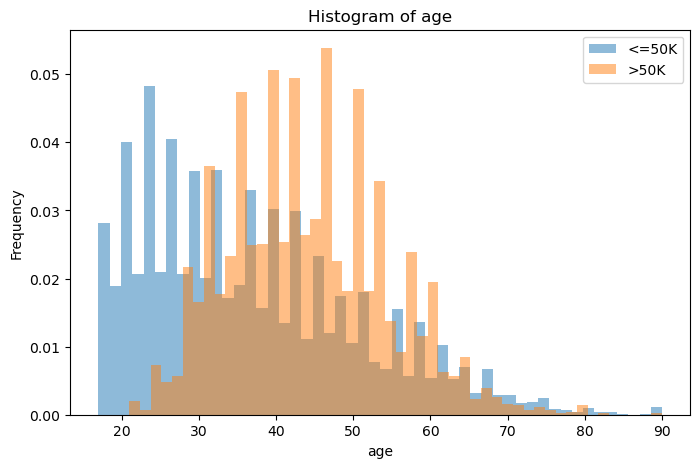

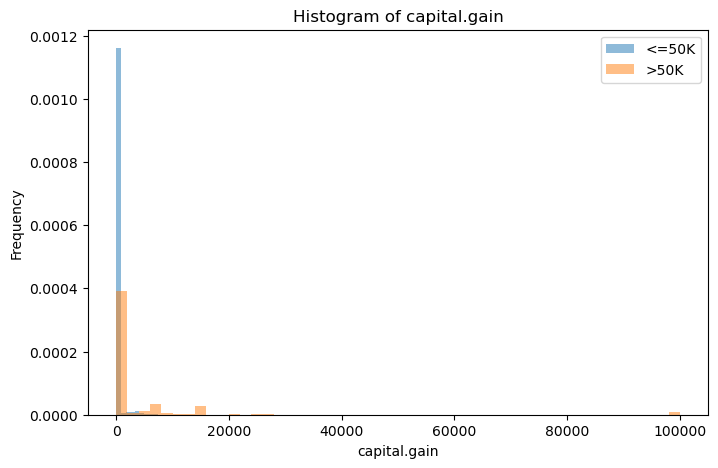

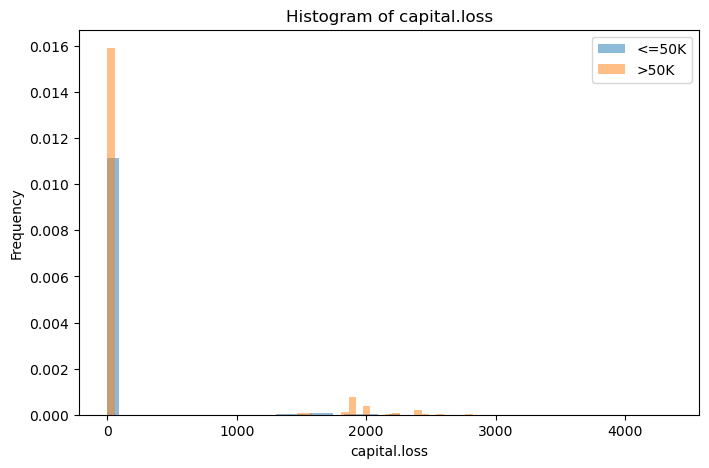

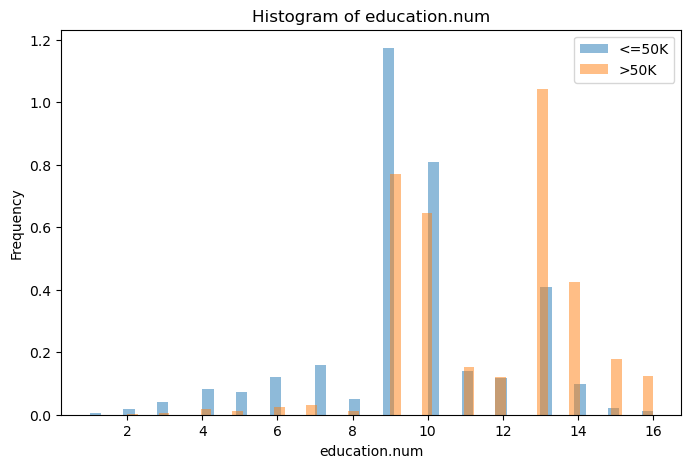

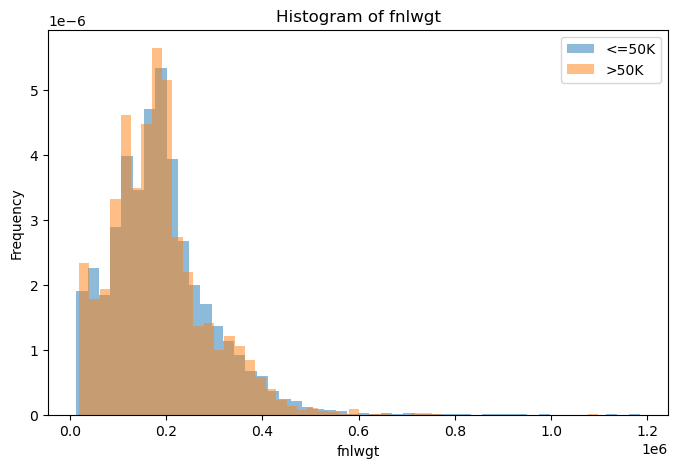

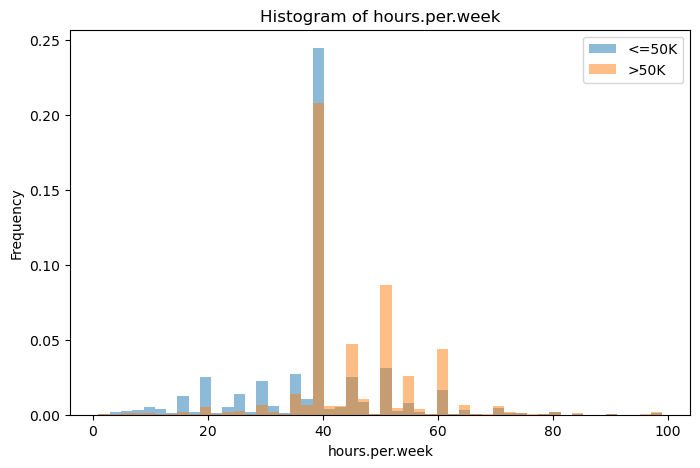

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot overlapping histograms for each numeric feature
for feat in numeric_cols:
    plt.figure(figsize=(8, 5))

    train_df.groupby("income")[feat].plot.hist(bins=50, alpha=0.5, legend=True, density = True, title = "Histogram of " + feat)
    plt.xlabel(feat)

<!-- END QUESTION -->

<br><br><br><br>

## Exercise 2: Identifying different feature types and transformations  
<hr>

Typically, data isn't readily formatted for direct input into machine learning models. It's crucial for a machine learning practitioner to examine each column and determine an effective method for encoding its information. Let's determine the types of features we have and come up with suitable encoding strategies for them. 

<!-- BEGIN QUESTION -->

### 2.1 Identify transformations to apply
rubric={reasoning}

Before passing this data to a machine learning model, we need to apply some transformations on different features. Below we are providing possible transformations which can be applied on each column in `census_df`.  

**Your tasks:**
1. Write your justification or explanation for each row in the explanation column. An example explanation is given for the age column. 

> Note: This question is a bit open-ended. If you do not agree with the provided transformation, feel free to argue your case in the explanation. That said, in this assignment, go with the transformations provided below for the purpose of autograding. 

> You can find the information about the columns [here](http://archive.ics.uci.edu/ml/datasets/Adult).

<div class="alert alert-warning">

Solution_2.1
    
</div>

| Feature | Transformation | Explanation
| --- | ----------- | ----- |
| age | scaling with `StandardScaler` |  A numeric feature with no missing values, ranging from 17 to 90. Scaling is recommended due to its distinct range compared to other numeric features. While MinMaxScaler might be more suitable, using StandardScaler should be fine too.|
| workclass | imputation, one-hot encoding | |
| fnlwgt | drop |  |
| education | ordinal encoding | |
| education.num | drop | |
| marital.status | one-hot encoding  | |
| occupation | imputation, one-hot encoding  | |
| relationship | one-hot encoding  | |
| race | drop  |  |
| sex | one-hot encoding with "binary=True" | |
| capital.gain | scaling with `StandardScaler` |  | 
| capital.loss | scaling with `StandardScaler` |  |
| hours.per.week | scaling with `StandardScaler` | |
| native.country | imputation, one-hot encoding | | 


_Points:_ 13

workclass: 
imputation is needed because we have missing values,
One-hot encoding is to transform text information into numeric information creating each columns for each categories, workclass categorization is finite

fnlwgt:
final weight is a parameter that helps us decide how representative the sample is, which is not appropriate to take into consideration when we try to train ml model on

education:
ordinal encoding would give us a numeric data of each persons education level rather than just a test information.
we use ordinal encoding because education level could be ordered based on what level of education the sample has got.

marital status:
marital status could also be ordered so we use ordianl encoder to get numeric information

occupation:
We first do imputation to tackle missing value, and then apply one-hot encoding to get columns that represents each occupation, occupation categories are finite, 

relationship:
relationship categories are finite.

race:
race should not matter when considering data to get an insight from it 

sex: 
There are only 2 sex in this data. so binary=True, to get numeric value we use one-hot encoding 

capital.gain:
since it has different range from other numeric features we use standardscaler.
Also it is a good practice to use the same type of scaler across all numeric features rather than mixing different scalers.

hours.per.week:
this feature has a distinct range of 0-168(potentially) and since this range is different from other nueric features we use scaler, often, ml algorithms performs better on standardized or normalized data

native.country:
address missing values by imputation
use one-hot encoding to get numeric information about the country categories because it the numeber of countries is finite


<!-- END QUESTION -->

<br><br>

### 2.2 Identify feature types 
rubric={autograde}


**Your tasks:**
1. Based on the types of transformations we want to apply on the features above, identify different feature types and store them in the variables below as lists.  

<div class="alert alert-warning">
    
Solution_2.2
    
</div>

_Points:_ 5

In [65]:
# Fill in the lists below.
numeric_features = ["age","capital.gain","capital.loss","hours.per.week"]
categorical_features = ["workclass", "occupation","marital.status","relationship","native.country"]
ordinal_features = ["education"]
binary_features = ["sex"]
drop_features = ["fnlwgt","education.num","race"]
target = "income"

...

Ellipsis

In [66]:
# Sorting all the lists above for the autograder
numeric_features.sort()
categorical_features.sort()
ordinal_features.sort()
binary_features.sort()
drop_features.sort()

In [67]:
grader.check("q2.2")

q2.2 results: All test cases passed!

<br><br><br><br>

## Exercise 3: Baseline models 

### 3.1 Separating feature vectors and targets  
rubric={autograde}

**Your tasks:**

1. Create `X_train`, `y_train`, `X_test`, `y_test` from `train_df` and `test_df`. 

<div class="alert alert-warning">
    
Solution_3.1
    
</div>

_Points:_ 1

In [68]:
X_train = train_df.drop(columns=[target])
y_train = train_df[target]
X_test = test_df.drop(columns=[target])
y_test = test_df[target]

...

Ellipsis

In [69]:
grader.check("q3.1")

q3.1 results: All test cases passed!

<br><br>

### 3.2 Dummy classifier
rubric={autograde}

**Your tasks:**

1. Carry out 5-fold cross-validation using [`scikit-learn`'s `cross_validate`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html) function with `return_train_score=True` and store the results as a dataframe named `dummy_df` where each row corresponds to the results from a cross-validation fold. 

<div class="alert alert-warning">
    
Solution_3.2
    
</div>

_Points:_ 1

In [70]:
dummy_clf = DummyClassifier(strategy="most_frequent")
scores = cross_validate(dummy_clf, X_train, y_train, cv=5, return_train_score=True)
dummy_df = pd.DataFrame(scores)
dummy_df

,fit_time,score_time,test_score,train_score
0,0.006491,0.002937,0.758157,0.758230
1,0.005895,0.002987,0.758157,0.758230
2,0.006430,0.003022,0.758157,0.758230
3,0.005868,0.002858,0.758157,0.758230
4,0.006336,0.002906,0.758449,0.758157


In [71]:
grader.check("q3.2")

q3.2 results: All test cases passed!

<br><br>

<!-- BEGIN QUESTION -->

### 3.3 Discussion
rubric={reasoning}

**Your tasks:**
1. Hopefully, you successfully run cross-validation with the dummy classifier in the previous question. Now, if you were to train the [`sklearn`'s `SVC`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) model on `X_train` and `y_train`, would it work? Briefly explain your reasoning.

<div class="alert alert-warning">
    
Solution_3.3
    
</div>

_Points:_ 2

It would work, but due to increased size of dimension caused by one hot encoding, the process might be slow.


<!-- END QUESTION -->

<br><br><br><br>

## Exercise 4: Column transformer 
<hr>

In this dataset, we have different types of features: numeric features, an ordinal feature, categorical features, and a binary feature. We want to apply different transformations on different columns and therefore we need a column transformer. First, we'll define different transformations on different types of features and then will create a `scikit-learn`'s `ColumnTransformer` using `make_column_transformer`. For example, the code below creates a `numeric_transformer` for numeric features. 

In [72]:
from sklearn.preprocessing import StandardScaler

numeric_transformer = StandardScaler()

In the exercises below, you'll create transformers for other types of features. 

<br><br>

### 4.1 Preprocessing ordinal features
rubric={autograde}

**Your tasks:**

1. Create a transformer called `ordinal_transformer` for our ordinal features. 

> Ordering of some of the education levels is not obvious. Assume that "HS-grad" < "Prof-school" < "Assoc-voc" < "Assoc-acdm" < "Some-college" < "Bachelors"

<div class="alert alert-warning">
    
Solution_4.1
    
</div>

_Points:_ 5

In [73]:
education_levels = ['Preschool', '1st-4th','5th-6th',"7th-8th",'9th', '10th', '11th', '12th',"HS-grad" , "Prof-school" , "Assoc-voc" , "Assoc-acdm" , "Some-college" , "Bachelors",'Masters','Doctorate']
assert set(education_levels) == set(X_train["education"].unique())
ordinal_transformer = OrdinalEncoder(categories = [education_levels], dtype = int)

...

Ellipsis

In [74]:
ordinal_transformer.fit(X_train[["education"]])

OrdinalEncoder(categories=[['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th',
                            '10th', '11th', '12th', 'HS-grad', 'Prof-school',
                            'Assoc-voc', 'Assoc-acdm', 'Some-college',
                            'Bachelors', 'Masters', 'Doctorate']],
               dtype=<class 'int'>)

In [75]:
grader.check("q4.1")

q4.1 results: All test cases passed!

<br><br>

### 4.2 Preprocessing binary features
rubric={autograde}

**Your tasks:**

1. Create a transformer called `binary_transformer` for our binary features to encode binary features as integers 0 and 1.

> _Note that many popular datasets have sex as a feature where the possible values are male and female. This representation reflects how the data were collected and is not meant to imply that, for example, gender is binary._

<div class="alert alert-warning">
    
Solution_4.2
    
</div>

_Points:_ 2

In [76]:
binary_transformer = OneHotEncoder(drop = "if_binary", dtype = int)
binary_transformer.fit([binary_features])
...

Ellipsis

In [77]:
grader.check("q4.2")

q4.2 results: All test cases passed!

<br><br>

### 4.3 Preprocessing categorical features
rubric={autograde}

There are a few categorical features with missing values in our dataset. Our initial step is to impute these missing values before proceeding to one-hot encode the features. For this assignment, apply imputation to all categorical features, regardless of whether they have missing values. If a feature lacks missing values, the imputation step will have no effect.

If we want to apply more than one transformation on a set of features, we need to create a [`scikit-learn` `Pipeline`](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html). For example, for categorical features we can create a `scikit-learn` `Pipeline` with first step as imputation and the second step as one-hot encoding. 

**Your tasks:**

1. Create a `sklearn` `Pipeline` using [`make_pipeline`](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html) called `categorical_transformer` for our categorical features with two steps:
- `SimpleImputer` for imputation with `strategy="constant"` and `fill_value="missing"`
- `OneHotEncoder` with `handle_unknown="ignore"` and `sparse_output=False` for one-hot encoding. 

<div class="alert alert-warning">
    
Solution_4.3
    
</div>

_Points:_ 4

In [78]:
categorical_transformer = make_pipeline(SimpleImputer(strategy="constant", fill_value="missing"), OneHotEncoder(handle_unknown="ignore" , sparse_output=False))

categorical_transformer

Pipeline(steps=[('simpleimputer',
                 SimpleImputer(fill_value='missing', strategy='constant')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

In [79]:
grader.check("q4.3")

q4.3 results: All test cases passed!

<br><br>

### 4.4 Creating a column transformer. 
rubric={autograde}

**Your tasks:**
1. Create a `sklearn` `ColumnTransformer` named `preprocessor` using [`make_column_transformer`](https://scikit-learn.org/stable/modules/generated/sklearn.compose.make_column_transformer.html) with the transformers defined in the previous exercises. Use the sequence below in the column transformer and add a "drop" step for the `drop_features` in the end.  
    - `numeric_transformer`
    - `ordinal_transformer`
    - `binary_transformer`
    - `categorical_transformer`
2. Transform the data by calling `fit_transform` on the training set and save it as a dataframe in a variable called `transformed_df`. How many new columns have been created in the preprocessed data in comparison to the original `X_train`? Store the difference between the number of columns in `transformed_df` and `X_train` in a variable called `n_new_cols`. 

> You are not required to do this but optionally you can try to get column names of the transformed data and create the dataframe `transformed_df` with proper column names. 

<div class="alert alert-warning">
    
Solution_4.4
    
</div>

_Points:_ 7

In [80]:
numeric_transformer

StandardScaler()

In [81]:
preprocessor = make_column_transformer(
    (numeric_transformer, numeric_features),
    (ordinal_transformer, ordinal_features),
    (binary_transformer, binary_features),
    (categorical_transformer, categorical_features),
    ("drop", drop_features)
)
preprocessor

ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 ['age', 'capital.gain', 'capital.loss',
                                  'hours.per.week']),
                                ('ordinalencoder',
                                 OrdinalEncoder(categories=[['Preschool',
                                                             '1st-4th',
                                                             '5th-6th',
                                                             '7th-8th', '9th',
                                                             '10th', '11th',
                                                             '12th', 'HS-grad',
                                                             'Prof-school',
                                                             'Assoc-voc',
                                                             'Assoc-acdm',
                                                             'Some-college',
                                                             'Bachelors',
                                                             'Masters',
                                                             'Doctorate']],
                                                dtype=<class...
                                 OneHotEncoder(drop='if_binary',
                                               dtype=<class 'int'>),
                                 ['sex']),
                                ('pipeline',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['marital.status', 'native.country',
                                  'occupation', 'relationship', 'workclass']),
                                ('drop', 'drop',
                                 ['education.num', 'fnlwgt', 'race'])])

In [82]:
drop_features

['education.num', 'fnlwgt', 'race']

In [83]:
categorical_features

['marital.status', 'native.country', 'occupation', 'relationship', 'workclass']

In [84]:
numeric_features

['age', 'capital.gain', 'capital.loss', 'hours.per.week']

In [87]:
transformed_df = preprocessor.fit_transform(X_train)
transformed_df

array([[-0.92190947, -0.14748266, -0.21474155, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43624842, -0.14748266, -0.21474155, ...,  0.        ,
         0.        ,  0.        ],
       [-0.84843247, -0.14748266, -0.21474155, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.92190947, -0.14748266, -0.21474155, ...,  0.        ,
         0.        ,  0.        ],
       [-0.77495548, -0.14748266, -0.21474155, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.10676843, -0.14748266, -0.21474155, ...,  0.        ,
         0.        ,  0.        ]])

In [91]:
n_new_cols = transformed_df.shape[1] - X_train.shape[1]
n_new_cols

70

In [92]:
grader.check("q4.4")

q4.4 results: All test cases passed!

<br><br>

<!-- BEGIN QUESTION -->

### 4.5 Short answer questions
rubric={reasoning}

**Your tasks:**

Answer each of the following questions in 2 to 3 sentences. 

1. What is the problem with calling `fit_transform` on your test data with `StandardScaler`?
2. Why is it important to follow the Golden Rule? If you violate it, will that give you a worse classifier?
3. What are two advantages of using sklearn Pipelines? 
4. When is it appropriate to use sklearn `ColumnTransformer`? 

<div class="alert alert-warning">
    
Solution_4.5
    
</div>

_Points:_ 8

1, That may lead to data leakage because the model indirectly learns from test data, making performance evaluation unreliable. fit() should only be used on training data, transform should be used both on training and test set

2, The Golden Rule states that test data should not influence model training in any way. if violated, the model might perform better on the test set, but it loses generality and becomes way less applicable to other real world data. (overfitting)

3, It prevents the data leakages by ensuring that transformation is only learned from training set
4, when different types of preprocessing needs to be applied to different columns

<!-- END QUESTION -->

<br><br><br><br>

## Exercise 5: Building models 

Now that we have preprocessed features, we are ready to build models. Below, I'm providing the function we used in class which returns mean cross-validation score along with standard deviation for a given model. Use it to keep track of your results. 

In [93]:
results_dict = {}  # dictionary to store all the results

In [94]:
def mean_std_cross_val_scores(model, X_train, y_train, **kwargs):
    """
    Returns mean and std of cross validation

    Parameters
    ----------
    model :
        scikit-learn model
    X_train : numpy array or pandas DataFrame
        X in the training data
    y_train :
        y in the training data

    Returns
    ----------
        pandas Series with mean scores from cross_validation
    """

    scores = cross_validate(model, X_train, y_train, **kwargs)

    mean_scores = pd.DataFrame(scores).mean()
    std_scores = pd.DataFrame(scores).std()
    out_col = []

    for i in range(len(mean_scores)):
        out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores.iloc[i], std_scores.iloc[i])))

    return pd.Series(data=out_col, index=mean_scores.index)

Below, I'm showing an example where I call `mean_std_cross_val_scores` with `DummyClassifier`. The function calls `cross_validate` with the passed arguments and returns a series with mean cross-validation results and std of cross-validation. When you train new models, you can just add the results of these models in `results_dict`, which can be easily converted to a dataframe so that you can have a table with all your results. 

In [95]:
# Baseline model

from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(random_state = 123)
pipe = make_pipeline(preprocessor, dummy)
results_dict["dummy"] = mean_std_cross_val_scores(
    pipe, X_train, y_train, cv=5, return_train_score=True
)
results_df = pd.DataFrame(results_dict).T
results_df

,fit_time,score_time,test_score,train_score
dummy,0.035 (+/- 0.007),0.014 (+/- 0.002),0.758 (+/- 0.000),0.758 (+/- 0.000)


<br><br>

<!-- BEGIN QUESTION -->

### 5.1 Trying different classifiers
rubric={accuracy,quality}

**Your tasks:**

1. For each model provided in the starter code below:
    - Create a pipeline using `make_pipeline` with two steps: the preprocessor from section 4.4 and the model as your classifier.
    - Conduct 5-fold cross-validation using the pipeline. Obtain the mean cross-validation scores and standard deviation using the `mean_std_cross_val_scores` function provided earlier.
    - Record the results in a dataframe named `income_pred_results_df`. Use the model names from the models dictionary below as the index. Each row should represent results from the `mean_std_cross_val_scores` function. In essence, `income_pred_results_df` should resemble the `results_df` dataframe mentioned earlier, but with additional rows for the subsequent models.

> Note: The execution might take some time. Please be patient!"

In [96]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

models = {
    "decision tree": DecisionTreeClassifier(random_state=123),
    "kNN": KNeighborsClassifier(),
    "RBF SVM": SVC(random_state=123),
}

<div class="alert alert-warning">
    
Solution_5.1
    
</div>

_Points:_ 10

In [97]:
dt_model_pipeline = make_pipeline(preprocessor, models["decision tree"])
knn_model_pipeline = make_pipeline(preprocessor, models["kNN"])
svm_model_pipeline = make_pipeline(preprocessor, models["RBF SVM"])

In [98]:
results_dict["decision tree"] = mean_std_cross_val_scores(dt_model_pipeline, X_train, y_train, cv=5, return_train_score=True)
results_dict["kNN"] = mean_std_cross_val_scores(knn_model_pipeline, X_train, y_train, cv=5, return_train_score=True)
results_dict["RBF SVM"] = mean_std_cross_val_scores(svm_model_pipeline, X_train, y_train, cv=5, return_train_score=True)

In [100]:
income_pred_results_df = pd.DataFrame(results_dict)
income_pred_results_df

,dummy,decision tree,kNN,RBF SVM
fit_time,0.035 (+/- 0.007),0.100 (+/- 0.013),0.036 (+/- 0.003),3.028 (+/- 0.509)
score_time,0.014 (+/- 0.002),0.013 (+/- 0.001),0.432 (+/- 0.843),2.018 (+/- 0.545)
test_score,0.758 (+/- 0.000),0.814 (+/- 0.012),0.836 (+/- 0.008),0.852 (+/- 0.005)
train_score,0.758 (+/- 0.000),0.987 (+/- 0.001),0.883 (+/- 0.003),0.855 (+/- 0.002)


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

### 5.2 Discussion 
rubric={reasoning}

**Your tasks:**

Examine the train and validation accuracies and `fit` and `score` times for all the models in the results above and answer the questions below: 

1. Among the models, which one achieves the highest validation accuracy?
2. Excluding the dummy model, which model exhibits the shortest 'fit' time? Similarly, which model boasts the quickest 'score' time?
3. Among the models (excluding the dummy model), which one shows the highest degree of overfitting and which one exhibits the least overfitting?

<div class="alert alert-warning">
    
Solution_5.2
    
</div>

_Points:_ 5

1. support vector machine
2. knn
3. highest overfitting: decision tree,<br>
   least overfitting : support vector machine
    


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

### 5.3 Hyperparameter optimization
rubric={accuracy,quality}

In this exercise, you'll carry out hyperparameter optimization for the hyperparameter `C` of SVC RBF classifier. In practice, you'll carry out hyperparameter optimization for all different hyperparameters of the most promising classifiers. For the purpose of this assignment, we'll only do it for the `SVC` classifier with one hyperparameter, namely `C`. 

**Your tasks:**

1. For each `C` value in the `param_grid` below: 
    - Create a pipeline object with two steps: preprocessor from 4.4 and `SVC` classifier with the `C` value.
    - Carry out 5-fold cross validation with the pipeline.  
    - Store the results in `results_dict` and display results as a pandas DataFrame. 
2. Which hyperparameter value seems to be performing the best? In this assignment, consider the hyperparameter value that gives you the highest cross-validation score as the "best" one. Store it in a variable called `best_C`. (Since this question is not autograded, please store the value directly as a number, something like `best_C = 0.001`, if `C = 0.001` is giving you the highest CV score.) Is it different than the default value for the hyperparameter used by `scikit-learn`? 

> Note: Running this will take a while. Please be patient. 

In [101]:
param_grid = {"C": np.logspace(-1, 2, 4)}
param_grid

{'C': array([  0.1,   1. ,  10. , 100. ])}

<div class="alert alert-warning">
    
Solution_5.3
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [102]:
param_grid["C"]

array([  0.1,   1. ,  10. , 100. ])

In [103]:
for c in param_grid["C"]:
    svm_pipeline = make_pipeline(preprocessor,SVC(C = c, random_state = 123))
    results_dict["svm(C = " + str(c) + ")"] = mean_std_cross_val_scores(svm_pipeline, X_train, y_train, cv = 5, return_train_score = True)



In [104]:
income_pred_results_df = pd.DataFrame(results_dict)
income_pred_results_df

,dummy,decision tree,kNN,RBF SVM,svm(C = 0.1),svm(C = 1.0),svm(C = 10.0),svm(C = 100.0)
fit_time,0.035 (+/- 0.007),0.100 (+/- 0.013),0.036 (+/- 0.003),3.028 (+/- 0.509),3.051 (+/- 0.471),2.994 (+/- 0.540),2.264 (+/- 0.047),3.479 (+/- 0.058)
score_time,0.014 (+/- 0.002),0.013 (+/- 0.001),0.432 (+/- 0.843),2.018 (+/- 0.545),2.025 (+/- 0.129),1.799 (+/- 0.092),1.435 (+/- 0.079),1.378 (+/- 0.047)
test_score,0.758 (+/- 0.000),0.814 (+/- 0.012),0.836 (+/- 0.008),0.852 (+/- 0.005),0.838 (+/- 0.006),0.852 (+/- 0.005),0.858 (+/- 0.005),0.860 (+/- 0.006)
train_score,0.758 (+/- 0.000),0.987 (+/- 0.001),0.883 (+/- 0.003),0.855 (+/- 0.002),0.838 (+/- 0.002),0.855 (+/- 0.002),0.862 (+/- 0.002),0.871 (+/- 0.002)


In [105]:
best_C = 100.0

...

Ellipsis

<!-- END QUESTION -->

<br><br><br><br>

## Exercise 6: Evaluating on the test set 
<hr>

Now that we have a best performing model, it's time to assess our model on the set aside test set. In this exercise, you'll examine whether the results you obtained using cross-validation on the train set are consistent with the results on the test set. 

### 6.1 Scoring on the unseen test set 
rubric={autograde}

**Your tasks:**

1. Create a pipeline named `final_pipeline` with the preprocessor from 4.4 as the first step and the best performing SVC model from 5.4 as the second step. 
2. Train the pipeline on the entire training set `X_train` and `y_train`. 
3. Score the pipeline on `X_test` and `y_test` and store the score in a variable called `test_score`.  

<div class="alert alert-warning">
    
Solution_6.1
    
</div>

_Points:_ 3

In [106]:
final_pipeline = make_pipeline(preprocessor, SVC(C = best_C, random_state=123))
final_pipeline.fit(X_train, y_train)
test_score = final_pipeline.score(X_test, y_test)


In [107]:
grader.check("q6.1")

q6.1 results: All test cases passed!

<br><br><br><br>

## Exercise 7: Short answer questions

<!-- BEGIN QUESTION -->

### 7.1 kNNs toy example
rubric={points}

Suppose you want to get predictions using the $k$-nearest neighbour algorithm on the toy dataset below. 

$$ X = \begin{bmatrix}5 & 2\\4 & -2\\  2 & 2\\ 10 & 10\\ 9 & -1\\ 9& 9\end{bmatrix}, \quad y = \begin{bmatrix}0\\0\\1\\1\\1\\2\end{bmatrix}.$$

Suppose you are given a new data point $x=\begin{bmatrix} 0 & 0\end{bmatrix}$.  

1. What would the model predict when $k=1$?
2. What would the model predict when $k=3$?
3. What would the model predict when $k=3$ if we were doing regression rather than classification? 

<div class="alert alert-warning">
    
Solution_7.1
    
</div>

_Points:_ 4

In [108]:
X = np.array([
    [5, 2],
    [4, -2],
    [2, 2],
    [10, 10],
    [9, -1],
    [9, 9]
])

y = np.array([0, 0, 1, 1, 1, 2]) # Labels

x_new = np.array([[0, 0]]) # 2D array


In [109]:
# Compute Euclidean distances
# axis = 1 -> operation is being done on columns
distances = np.linalg.norm(X - x_new, axis=1)
distances

array([ 5.38516481,  4.47213595,  2.82842712, 14.14213562,  9.05538514,
       12.72792206])

1. 1
2. 0
3. 0.33 (average of 0,0,1)

<!-- END QUESTION -->

<br><br>

**Before submitting your assignment, please make sure you have followed all the instructions in the Submission instructions section at the top.** 



Congratulations on finishing the homework! This was a tricky one but I hope you are feeling good after working on it. You are now ready to build a simple supervised machine learning pipeline on real-world datasets! Well done :clap:! 

![](img/eva-well-done.png)

